## AYTM Question 2

#### Douglas Lee

Let's start with the most relevant python imports:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Now let's read in the dataset:

In [2]:
df = pd.read_csv('dataset.csv')
df

,Segment,Metrics,Jan / 2016,Feb / 2016,Mar / 2016,Apr / 2016,May / 2016,Jun / 2016,Jul / 2016,Aug / 2016,...,Dec / 2017,Jan / 2018,Feb / 2018,Mar / 2018,Apr / 2018,May / 2018,Jun / 2018,Jul / 2018,Aug / 2018,Sep / 2018
0,Segment 1,"Total Revenue, $",2663.87825,2347.7365,3405.579,2645.98925,1567.76875,2055.14,3385.73,3757.8850,...,1824.68625,3229.22925,3749.07125,3190.56875,3334.64875,5998.7125,1750.1165,2783.92975,3121.7905,2568.85925
1,NaN,Lost Users (no transactions in next periods),53.00000,51.0000,54.000,43.00000,25.00000,34.00,42.00,53.0000,...,28.00000,35.00000,31.00000,31.00000,45.00000,35.0000,44.0000,42.00000,46.0000,36.00000
2,NaN,Total Number of Users,0.00000,100.0000,183.000,281.00000,346.00000,388.00,436.00,504.0000,...,1219.00000,1252.00000,1285.00000,1320.00000,1345.00000,1386.0000,1422.0000,1457.00000,1496.0000,1534.00000
3,NaN,Number of Purchases,219.00000,204.0000,282.000,342.00000,192.00000,198.00,285.00,261.0000,...,123.00000,267.00000,261.00000,123.00000,189.00000,159.0000,180.0000,132.00000,183.0000,102.00000
4,NaN,Number of Active Users (any transactions durin...,100.00000,107.0000,126.000,97.00000,77.00000,78.00,106.00,98.0000,...,54.00000,73.00000,71.00000,62.00000,75.00000,63.0000,66.0000,68.00000,66.0000,53.00000
5,NaN,Returning Users (any transactions in previous ...,0.00000,25.0000,27.000,26.00000,26.00000,21.00,20.00,26.0000,...,8.00000,16.00000,18.00000,18.00000,15.00000,10.0000,14.0000,13.00000,13.0000,15.00000
6,NaN,Returning Users (any transactions in next peri...,48.00000,56.0000,72.000,54.00000,52.00000,44.00,64.00,45.0000,...,26.00000,38.00000,40.00000,31.00000,30.00000,28.0000,22.0000,26.00000,20.0000,17.00000
7,NaN,Returning Users (any transactions in next month),30.00000,31.0000,30.000,29.00000,26.00000,21.00,32.00,22.0000,...,17.00000,21.00000,23.00000,23.00000,16.00000,16.0000,17.0000,17.00000,20.0000,17.00000
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Cleaning and Preprocessing

Let's do some cleaning and manipulation to get this into a format where the dates and segments are on the rows and the metrics are columns. First we get rid of the rows that are all `NaN`s or blanks:

In [3]:
df = df.dropna(how='all')
df

,Segment,Metrics,Jan / 2016,Feb / 2016,Mar / 2016,Apr / 2016,May / 2016,Jun / 2016,Jul / 2016,Aug / 2016,...,Dec / 2017,Jan / 2018,Feb / 2018,Mar / 2018,Apr / 2018,May / 2018,Jun / 2018,Jul / 2018,Aug / 2018,Sep / 2018
0,Segment 1,"Total Revenue, $",2663.87825,2347.7365,3405.579,2645.98925,1567.76875,2055.14,3385.73,3757.8850,...,1824.68625,3229.22925,3749.07125,3190.56875,3334.64875,5998.7125,1750.1165,2783.92975,3121.7905,2568.85925
1,NaN,Lost Users (no transactions in next periods),53.00000,51.0000,54.000,43.00000,25.00000,34.00,42.00,53.0000,...,28.00000,35.00000,31.00000,31.00000,45.00000,35.0000,44.0000,42.00000,46.0000,36.00000
2,NaN,Total Number of Users,0.00000,100.0000,183.000,281.00000,346.00000,388.00,436.00,504.0000,...,1219.00000,1252.00000,1285.00000,1320.00000,1345.00000,1386.0000,1422.0000,1457.00000,1496.0000,1534.00000
3,NaN,Number of Purchases,219.00000,204.0000,282.000,342.00000,192.00000,198.00,285.00,261.0000,...,123.00000,267.00000,261.00000,123.00000,189.00000,159.0000,180.0000,132.00000,183.0000,102.00000
4,NaN,Number of Active Users (any transactions durin...,100.00000,107.0000,126.000,97.00000,77.00000,78.00,106.00,98.0000,...,54.00000,73.00000,71.00000,62.00000,75.00000,63.0000,66.0000,68.00000,66.0000,53.00000
5,NaN,Returning Users (any transactions in previous ...,0.00000,25.0000,27.000,26.00000,26.00000,21.00,20.00,26.0000,...,8.00000,16.00000,18.00000,18.00000,15.00000,10.0000,14.0000,13.00000,13.0000,15.00000
6,NaN,Returning Users (any transactions in next peri...,48.00000,56.0000,72.000,54.00000,52.00000,44.00,64.00,45.0000,...,26.00000,38.00000,40.00000,31.00000,30.00000,28.0000,22.0000,26.00000,20.0000,17.00000
7,NaN,Returning Users (any transactions in next month),30.00000,31.0000,30.000,29.00000,26.00000,21.00,32.00,22.0000,...,17.00000,21.00000,23.00000,23.00000,16.00000,16.0000,17.0000,17.00000,20.0000,17.00000
11,Segment 2,"Total Revenue, $",26135.69500,16194.1000,18406.340,21153.76500,20789.72750,12799.03,13417.48,29340.9825,...,21721.42750,22015.04500,54364.77250,30521.59000,16996.16250,32151.4300,22838.1000,37200.89500,26328.1975,20664.01750
12,NaN,Lost Users (no transactions in next periods),3.00000,2.0000,6.000,5.00000,6.00000,6.00,0.00,9.0000,...,2.00000,5.00000,1.00000,7.00000,12.00000,13.0000,4.0000,16.00000,8.0000,12.00000


Now let's make sure all the rows in the `Segment` column have no `NaN`s:

In [4]:
df = df.ffill()
df

,Segment,Metrics,Jan / 2016,Feb / 2016,Mar / 2016,Apr / 2016,May / 2016,Jun / 2016,Jul / 2016,Aug / 2016,...,Dec / 2017,Jan / 2018,Feb / 2018,Mar / 2018,Apr / 2018,May / 2018,Jun / 2018,Jul / 2018,Aug / 2018,Sep / 2018
0,Segment 1,"Total Revenue, $",2663.87825,2347.7365,3405.579,2645.98925,1567.76875,2055.14,3385.73,3757.8850,...,1824.68625,3229.22925,3749.07125,3190.56875,3334.64875,5998.7125,1750.1165,2783.92975,3121.7905,2568.85925
1,Segment 1,Lost Users (no transactions in next periods),53.00000,51.0000,54.000,43.00000,25.00000,34.00,42.00,53.0000,...,28.00000,35.00000,31.00000,31.00000,45.00000,35.0000,44.0000,42.00000,46.0000,36.00000
2,Segment 1,Total Number of Users,0.00000,100.0000,183.000,281.00000,346.00000,388.00,436.00,504.0000,...,1219.00000,1252.00000,1285.00000,1320.00000,1345.00000,1386.0000,1422.0000,1457.00000,1496.0000,1534.00000
3,Segment 1,Number of Purchases,219.00000,204.0000,282.000,342.00000,192.00000,198.00,285.00,261.0000,...,123.00000,267.00000,261.00000,123.00000,189.00000,159.0000,180.0000,132.00000,183.0000,102.00000
4,Segment 1,Number of Active Users (any transactions durin...,100.00000,107.0000,126.000,97.00000,77.00000,78.00,106.00,98.0000,...,54.00000,73.00000,71.00000,62.00000,75.00000,63.0000,66.0000,68.00000,66.0000,53.00000
5,Segment 1,Returning Users (any transactions in previous ...,0.00000,25.0000,27.000,26.00000,26.00000,21.00,20.00,26.0000,...,8.00000,16.00000,18.00000,18.00000,15.00000,10.0000,14.0000,13.00000,13.0000,15.00000
6,Segment 1,Returning Users (any transactions in next peri...,48.00000,56.0000,72.000,54.00000,52.00000,44.00,64.00,45.0000,...,26.00000,38.00000,40.00000,31.00000,30.00000,28.0000,22.0000,26.00000,20.0000,17.00000
7,Segment 1,Returning Users (any transactions in next month),30.00000,31.0000,30.000,29.00000,26.00000,21.00,32.00,22.0000,...,17.00000,21.00000,23.00000,23.00000,16.00000,16.0000,17.0000,17.00000,20.0000,17.00000
11,Segment 2,"Total Revenue, $",26135.69500,16194.1000,18406.340,21153.76500,20789.72750,12799.03,13417.48,29340.9825,...,21721.42750,22015.04500,54364.77250,30521.59000,16996.16250,32151.4300,22838.1000,37200.89500,26328.1975,20664.01750
12,Segment 2,Lost Users (no transactions in next periods),3.00000,2.0000,6.000,5.00000,6.00000,6.00,0.00,9.0000,...,2.00000,5.00000,1.00000,7.00000,12.00000,13.0000,4.0000,16.00000,8.0000,12.00000


Now let's get the dataframe `df` into the desired format, as described above and also rename the columns corresponding to the metrics:

In [5]:
df = pd.DataFrame(df.pivot(index='Segment', columns='Metrics').unstack()).\
    reset_index().rename(columns={'level_0': 'Month'}).\
    pivot(index=['Month', 'Segment'], columns='Metrics').reset_index()

In [6]:
df.columns = ['Month', 'Segment', 'Lost', 'Active', 'Purchases', 'Returning_NextMo', 'Returning_NextPeriods', 'Returning_Prev', 'Total', 'Revenue']
df

,Month,Segment,Lost,Active,Purchases,Returning_NextMo,Returning_NextPeriods,Returning_Prev,Total,Revenue
0,Apr / 2016,Segment 1,43.0,97.0,342.0,29.0,54.0,26.0,281.0,2645.98925
1,Apr / 2016,Segment 2,5.0,26.0,96.0,16.0,21.0,15.0,48.0,21153.76500
2,Apr / 2017,Segment 1,31.0,69.0,159.0,17.0,38.0,22.0,936.0,2175.54225
3,Apr / 2017,Segment 2,4.0,25.0,84.0,15.0,21.0,13.0,149.0,19471.46250
4,Apr / 2018,Segment 1,45.0,75.0,189.0,16.0,30.0,15.0,1345.0,3334.64875
...,...,...,...,...,...,...,...,...,...,...
61,Sep / 2016,Segment 2,5.0,30.0,78.0,18.0,25.0,19.0,94.0,15704.78750
62,Sep / 2017,Segment 1,40.0,88.0,240.0,26.0,48.0,22.0,1092.0,3299.37275
63,Sep / 2017,Segment 2,1.0,32.0,123.0,28.0,31.0,21.0,188.0,13528.85500
64,Sep / 2018,Segment 1,36.0,53.0,102.0,17.0,17.0,15.0,1534.0,2568.85925


Now, let's turn the entries in the `Month` column into actual `datetime` objects so we can get them in the correct order:

In [7]:
df['Month'] = df['Month'].apply(lambda x: x.replace('/', '')).apply(pd.to_datetime)
df

,Month,Segment,Lost,Active,Purchases,Returning_NextMo,Returning_NextPeriods,Returning_Prev,Total,Revenue
0,2016-04-01,Segment 1,43.0,97.0,342.0,29.0,54.0,26.0,281.0,2645.98925
1,2016-04-01,Segment 2,5.0,26.0,96.0,16.0,21.0,15.0,48.0,21153.76500
2,2017-04-01,Segment 1,31.0,69.0,159.0,17.0,38.0,22.0,936.0,2175.54225
3,2017-04-01,Segment 2,4.0,25.0,84.0,15.0,21.0,13.0,149.0,19471.46250
4,2018-04-01,Segment 1,45.0,75.0,189.0,16.0,30.0,15.0,1345.0,3334.64875
...,...,...,...,...,...,...,...,...,...,...
61,2016-09-01,Segment 2,5.0,30.0,78.0,18.0,25.0,19.0,94.0,15704.78750
62,2017-09-01,Segment 1,40.0,88.0,240.0,26.0,48.0,22.0,1092.0,3299.37275
63,2017-09-01,Segment 2,1.0,32.0,123.0,28.0,31.0,21.0,188.0,13528.85500
64,2018-09-01,Segment 1,36.0,53.0,102.0,17.0,17.0,15.0,1534.0,2568.85925


Finally, sort by `Segment` and then `Month`:

In [8]:
df = df.sort_values(['Segment', 'Month']).reset_index().drop('index', axis=1)
df

,Month,Segment,Lost,Active,Purchases,Returning_NextMo,Returning_NextPeriods,Returning_Prev,Total,Revenue
0,2016-01-01,Segment 1,53.0,100.0,219.0,30.0,48.0,0.0,0.0,2663.87825
1,2016-02-01,Segment 1,51.0,107.0,204.0,31.0,56.0,25.0,100.0,2347.73650
2,2016-03-01,Segment 1,54.0,126.0,282.0,30.0,72.0,27.0,183.0,3405.57900
3,2016-04-01,Segment 1,43.0,97.0,342.0,29.0,54.0,26.0,281.0,2645.98925
4,2016-05-01,Segment 1,25.0,77.0,192.0,26.0,52.0,26.0,346.0,1567.76875
...,...,...,...,...,...,...,...,...,...,...
61,2018-05-01,Segment 2,13.0,47.0,180.0,23.0,34.0,27.0,245.0,32151.43000
62,2018-06-01,Segment 2,4.0,33.0,114.0,24.0,29.0,22.0,253.0,22838.10000
63,2018-07-01,Segment 2,16.0,39.0,189.0,17.0,23.0,22.0,255.0,37200.89500
64,2018-08-01,Segment 2,8.0,35.0,132.0,22.0,27.0,20.0,263.0,26328.19750


### Month-over-month Revenue and User Growth (Active and Total Users)

First we'll take a look at the month-over-month changes in revenue and total/active users for each of the segments, in order to compare how each of these business evolved over time:

In [9]:
df['Revenue_Pct_Change'] = df.groupby('Segment')['Revenue'].apply(pd.Series.pct_change).mul(100)
df['Total_Users_Pct_Change'] = df.groupby('Segment')['Total'].apply(pd.Series.pct_change).mul(100)
df['Active_Users_Pct_Change'] = df.groupby('Segment')['Active'].apply(pd.Series.pct_change).mul(100)

#### Month-over-month Revenue Growth

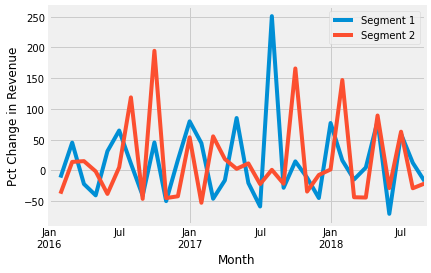

In [10]:
df.set_index('Month').groupby('Segment')['Revenue_Pct_Change'].plot()
plt.ylabel('Pct Change in Revenue')
plt.legend();

It looks like neither segment consistently exhibits postive or negative changes in monthly revenue, with both alternating between short periods (sometimes month-to-month) of postive and negative growth. There appear to be some months where Segment 1 sees a spike in postiive revenue growth while Segment 2 sees little, or even negative, growth (and vice versa). While there isn't enough information to make a detailed interpretation, there may be a specific annual event or holiday associated with the larger bakery represented by Segment 2 leading to the large positive spikes in monthly revenue which occur at the ends of the year in both 2016 and 2017. For the smaller bakery in Segment 1, the spike in monthly revenue in the Summer of 2017 looks a bit like an anomaly -- perhaps they simply had a very good month or there is some biannual event which contributed to this spike which only occurs in odd years. 

#### Month-over-month Growth in Total Users

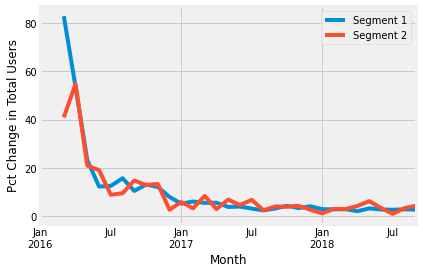

In [11]:
df.set_index('Month').groupby('Segment')['Total_Users_Pct_Change'].plot()
plt.ylabel('Pct Change in Total Users')
plt.legend();

Both segments experience rapid growth in total users from month-to-month at the beginning of the time period, which declines sharply to a still decent amount of growth in the second half of 2016 to more minimal growth from the start of 2017. These trends make sense given that each business went from building its user base to steadily growing it to mostly maintaining the base over this nearly two-year period. It appears that the smaller bakery from Segment 1 maintains a slightly steadier level of growth compared to the larger bakery from Segment 2. This trend might indicate that the smaller bakery from Segment 1, while being a smaller operation, might have a larger or less specialized customer base.

#### Month-over-month Growth in Active Users

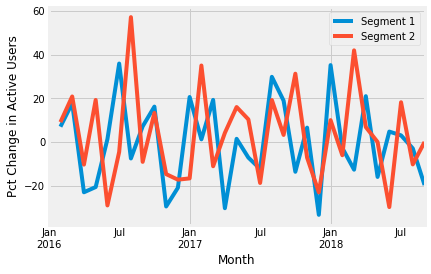

In [12]:
df.set_index('Month').groupby('Segment')['Active_Users_Pct_Change'].plot()
plt.ylabel('Pct Change in Active Users')
plt.legend();

As with revenue above, there is no consistent positive or negative trend for active users, which makes sense since one would expect active users and revenue to track with one another. It appears that the positive spikes in monthly active users tend to match those in revenue, although they are generally not as sharp, which suggests that these highly positive revenue growth months are driven by more purchases per user as well as an increase in active users.

### Average Transaction Value + Average Transactions Per Active User

Now, we'll look at the average transaction value and average transactions per user for each month. Note that we won't be looking at the change from month to month here, as we want to get a sense of typical purchases at different times of the year and the business' existence. We will plot these along with the number of active users to get a full sense of each segments' customer base.

In [13]:
df['Avg_Tx_Value'] = df['Revenue'].div(df['Purchases'])
df['Avg_Tx_Per_User'] = df['Purchases'].div(df['Active'])

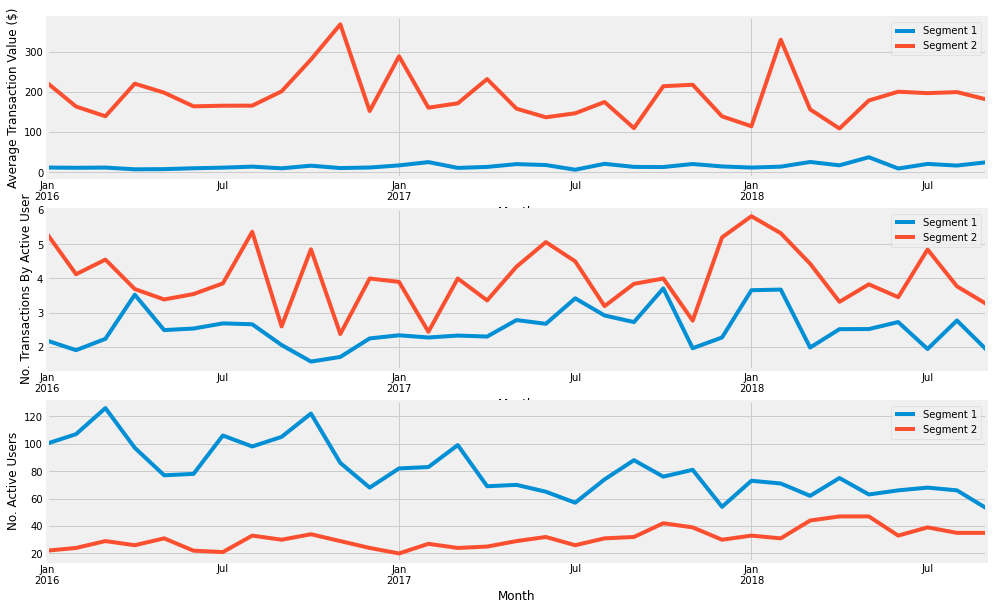

In [14]:
plt.figure(figsize=(15,10))

plt.subplot(3,1,1)
df.set_index('Month').groupby('Segment')['Avg_Tx_Value'].plot()
plt.ylabel('Average Transaction Value ($)')
plt.legend()

plt.subplot(3,1,2)
df.set_index('Month').groupby('Segment')['Avg_Tx_Per_User'].plot()
plt.ylabel('No. Transactions By Active User')
plt.legend()

plt.subplot(3,1,3)
df.set_index('Month').groupby('Segment')['Active'].plot()
plt.ylabel('No. Active Users')
plt.legend();

From the above, we can see that the small bakery of Segment 1 serves a larger (relative to Segment 2) customer base which tends to make a small number of purchases, each of which are relatively low in revenue. On the other hand, the larger bakery of Segment 2 serves a smaller customer base who tend to make slightly more purchases which generate much more revenue, relative to Segment 1. The plot of the number of active users is actually more revealing compared to the month-over-month trends, as we see that the larger bakery from Segment 2 looks to have a more steady stream of active users over the time period, while the smaller bakery from Segment 1 has experienced a slight decline in active users even if the average transaction value and transactions per customer remain relatively consistent.

### Repeat/Loyal User Rate

Finally, we'll look at the percentage of users in each segment who returned from the previous month. As with the transaction metrics, we will assess these rates without looking at month-over-month changes to get a high-level look at how often active users return the following month.

In [15]:
df['Loyal_User_Rate'] = df['Returning_Prev'].div(df['Active']).mul(100)

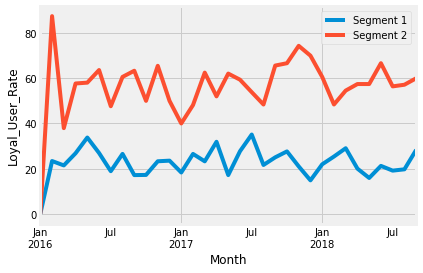

In [16]:
df.set_index('Month').groupby('Segment')['Loyal_User_Rate'].plot()
plt.ylabel('Loyal_User_Rate')
plt.legend();

The larger bakery of Segment 2 seems to rely much more on a loyal user base, which makes sense given their smaller base and lending credence that they serve a very specific market. The smaller bakery of Segment 2, which might have a potentially larger customer base, has a substantial base of loyal users but also have much more one-off users.

### Other Potential Metrics

We can go further with some of the above metrics already examined:

* Loyal User Rate, by only looking at those which return in the future months or the next month
* Monthly Revenue and User Growth as moving averages or just the raw monthly totals.

We can also take a look at other metrics regarding user retention/attrition, such as:

* User Churn Rate
* User Retention Rate

although I am unsure the current dataset has enough information regarding when new customers arrive and existing customers leave to assess these metrics.